## Importing libraries

In [2]:
!pip install xgboost

     --------------------------------------- 70.9/70.9 MB 13.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as pt
from scipy import stats
import sklearn
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from math import floor,ceil
import tabulate as tb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

## Loading data

In [4]:
data=pd.read_csv('water_potability.csv')


## Columns

In [5]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

## Data type of our columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Handling Missing values

In [7]:
data.isnull().sum().sort_values(ascending=False)

Sulfate            781
ph                 491
Trihalomethanes    162
Hardness             0
Solids               0
Chloramines          0
Conductivity         0
Organic_carbon       0
Turbidity            0
Potability           0
dtype: int64

In [8]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,'missing_percentage': percent_missing})
missing_value_df.sort_values(by='missing_percentage', ascending=False)

,column_name,missing_percentage
Sulfate,Sulfate,23.840049
ph,ph,14.987790
Trihalomethanes,Trihalomethanes,4.945055
Hardness,Hardness,0.000000
Solids,Solids,0.000000
Chloramines,Chloramines,0.000000
Conductivity,Conductivity,0.000000
Organic_carbon,Organic_carbon,0.000000
Turbidity,Turbidity,0.000000
Potability,Potability,0.000000


## Replacing missing values

In [9]:
data[:] = SimpleImputer(strategy='median').fit_transform(data)

In [10]:
data.isnull().sum().sort_values(ascending=False)

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

##           Data analysis





Text(0, 0.5, '')

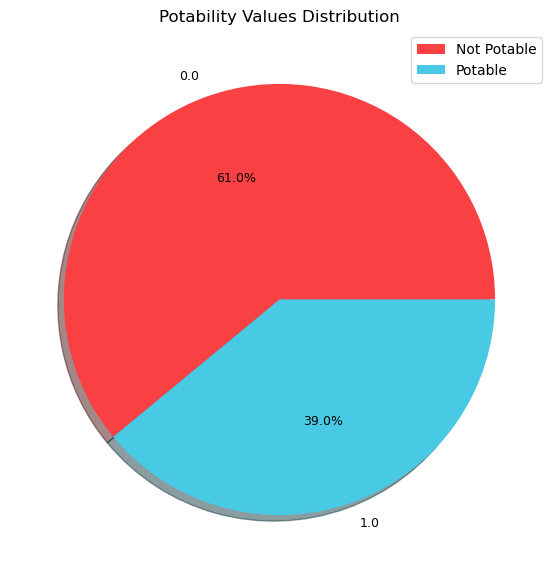

In [11]:
colors=['#f94144', '#48cae4']
labels=['Not Potable','Potable']
pieplot = data.groupby('Potability').size()
pieplot.plot(kind='pie', colors=colors, subplots=True,shadow=True, figsize=(7, 7), fontsize=9, autopct='%1.1f%%')
plt.title("Potability Values Distribution")
plt.legend(labels)
plt.ylabel("")

# Skewness

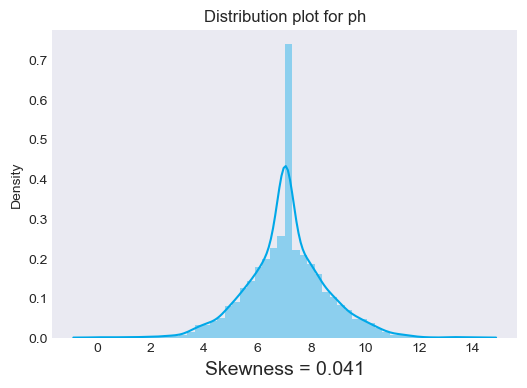

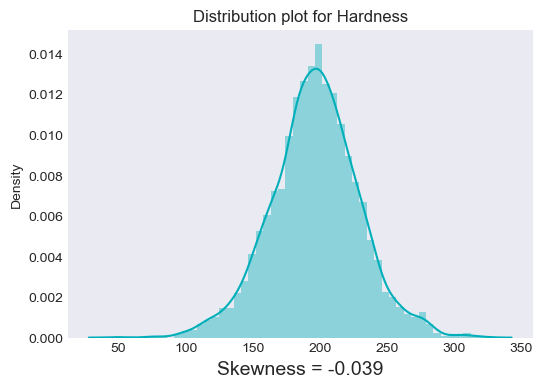

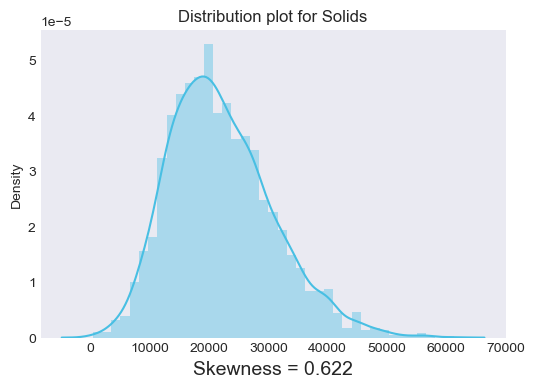

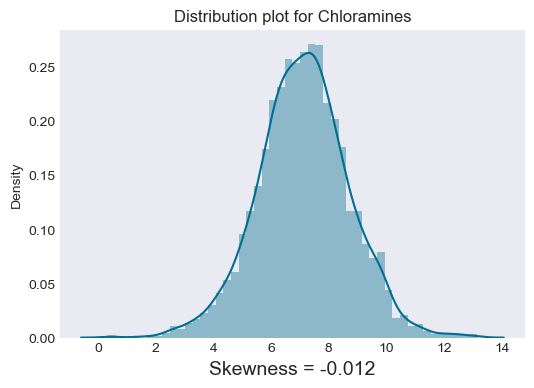

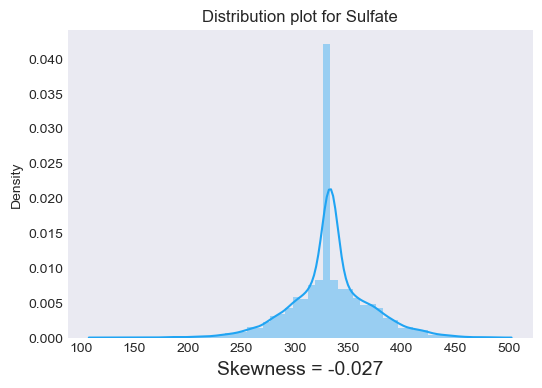

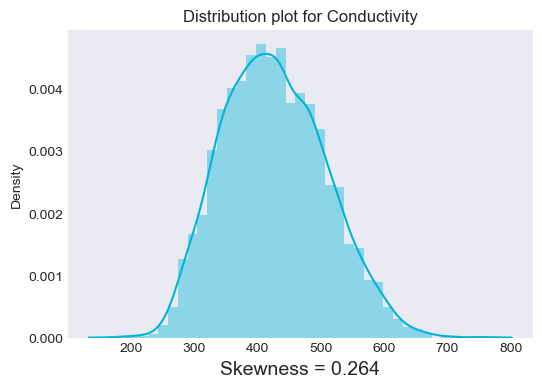

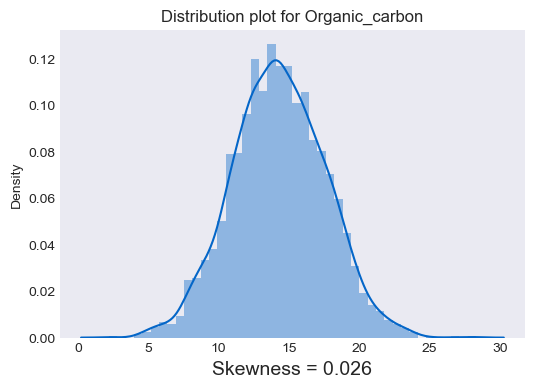

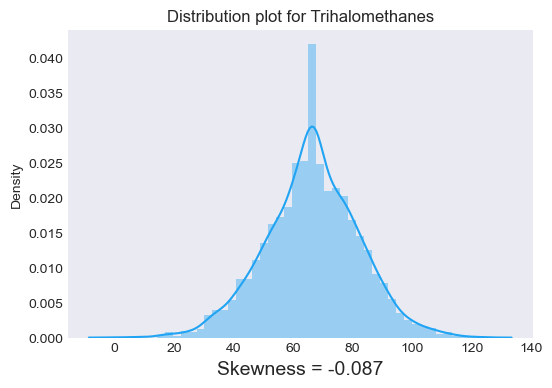

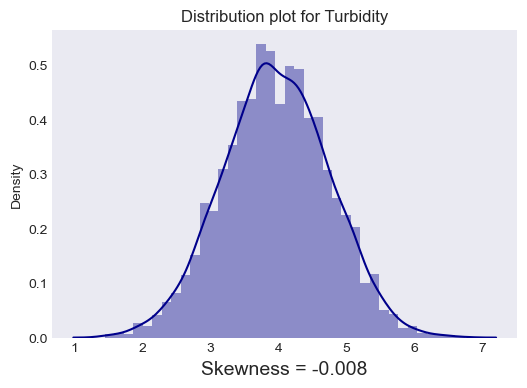

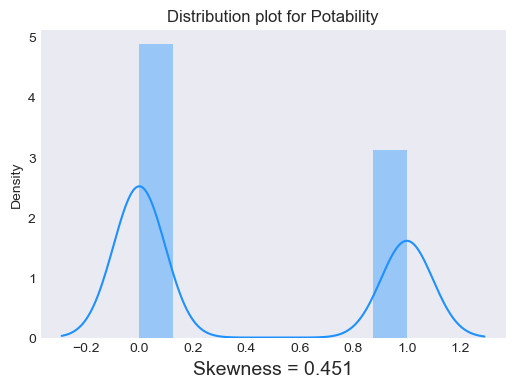

In [12]:
plt.style.use('seaborn-dark')
colors=['#00a8e8', '#00afb9',  '#48bfe3', '#006e90', '#20a4f3', '#00b4d8', '#0466c8', '#20a4f3', '#00008B','#1E90FF']
i=0
while i<10:
    for col in data.columns:
        plt.figure(figsize=(6,4))
        sns.distplot(data[col],color=colors[i])
        plt.title(f'Distribution plot for {col}')
        plt.xlabel(f'Skewness = {round(data[col].skew(),3)}',fontsize=14)
        i+=1
        plt.show()

# Correlation

Text(0.5, 1.0, 'Heatmap for All Features')

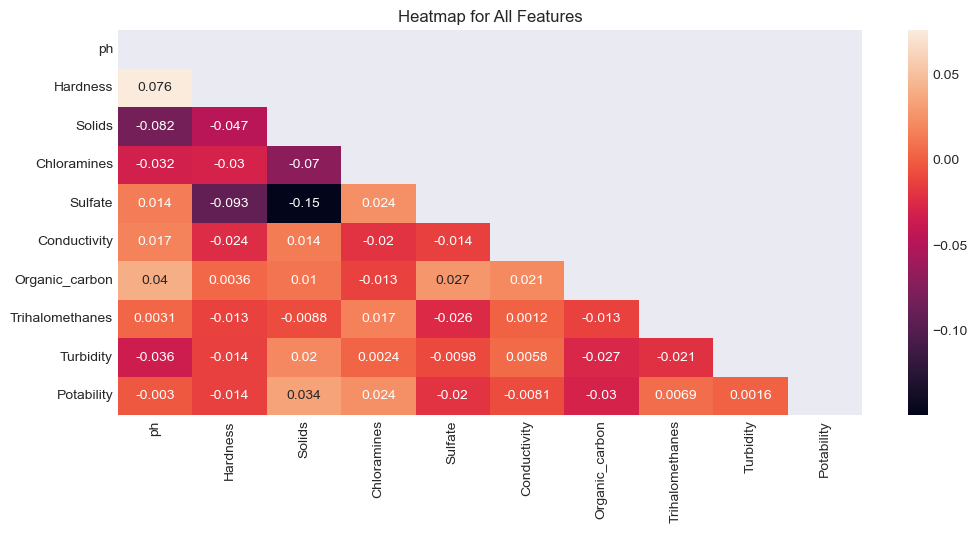

In [13]:
plt.figure(figsize=(12, 5))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
sns.heatmap(data.corr(), mask=mask,annot=True)
plt.title('Heatmap for All Features')

# Corellation of all the features on Potability

Text(0.5, 1.0, 'Descending Correlation with Potability')

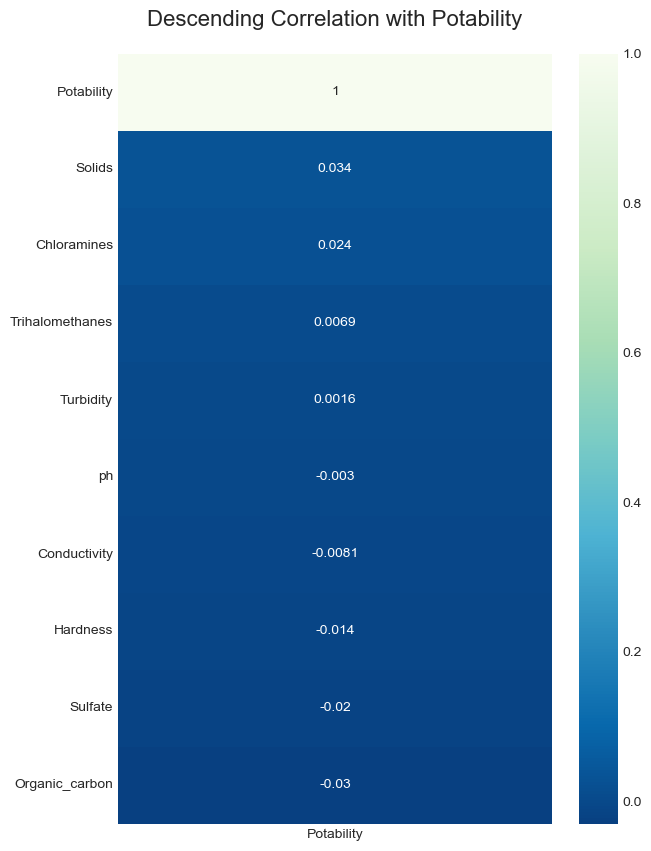

In [14]:
plt.figure(figsize=(7, 10))
heatmap = sns.heatmap(data.corr()[['Potability']].sort_values(by='Potability', ascending=False),annot=True, cmap='GnBu_r')
plt.title('Descending Correlation with Potability',pad=20, fontsize=16)

# Scaling

In [15]:
test_data=data.Potability
train_data=data.drop('Potability',axis=1)
print(test_data)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3271    1.0
3272    1.0
3273    1.0
3274    1.0
3275    1.0
Name: Potability, Length: 3276, dtype: float64


In [16]:
X_train, X_test, y_train, y_test = train_test_split(train_data, test_data, test_size=0.2, random_state=101)


In [17]:
l=[]
names=[]
for col in train_data.columns:
    names.append(col)
    l.append(f'{floor(train_data[col].min())} to {ceil(train_data[col].max())}')

tab = pd.DataFrame(list(zip(names,l)),columns =['Name', 'Range'])
print(tb.tabulate(tab, headers='keys', tablefmt='pretty'))

+---+-----------------+--------------+
|   |      Name       |    Range     |
+---+-----------------+--------------+
| 0 |       ph        |   0 to 14    |
| 1 |    Hardness     |  47 to 324   |
| 2 |     Solids      | 320 to 61228 |
| 3 |   Chloramines   |   0 to 14    |
| 4 |     Sulfate     |  129 to 482  |
| 5 |  Conductivity   |  181 to 754  |
| 6 | Organic_carbon  |   2 to 29    |
| 7 | Trihalomethanes |   0 to 124   |
| 8 |    Turbidity    |    1 to 7    |
+---+-----------------+--------------+


In [18]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
scaler = StandardScaler()
scaler.fit(X)
X=pd.DataFrame(scaler.transform(X))
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

## Modelling

In [19]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
models =[("LR", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DT", DecisionTreeClassifier()),('RF',RandomForestClassifier()),
        ('XGB',GradientBoostingClassifier())]

results = []
names = []
finalResults_cross = []
finalResults = []
confusion_matrixs=[]

for name,model in models:
    model.fit(X, y)
    # model_results = model.predict(X)
    y_pred = cross_val_predict(model, X, y, cv=10)
    conf_mat = confusion_matrix(y, y_pred)
    accuracy_cross= cross_val_score(model, X, y, cv = 10, scoring = 'accuracy').mean()*100
    # score = accuracy_score(y_test, model_results,average='macro')
    results.append(accuracy_cross)
    names.append(name)
    confusion_matrixs.append((name,conf_mat))
    finalResults_cross.append((name,accuracy_cross))

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = accuracy_score(y_test, model_results)*100
    results.append(score)
    names.append(name)
    finalResults.append((name,score))


    # model.fit(X_train, y_train)
    # model_results = model.predict(X_test)
    # #y_pred = cross_val_predict(model, X_train, y_train, cv=10)
    # conf_mat = confusion_matrix(y_test, model_results)
    # # accuracy= cross_val_score(model, X_train, y_train, cv = 10, scoring = 'accuracy').mean()*100
    # accuracy=  precision_score(y_test, model_results)
    # results.append(accuracy)
    # names.append(name)
    # confusion_matrixs.append((name,conf_mat))
    # finalResults.append((name,accuracy))
    
finalResults_cross.sort(key=lambda k:k[1],reverse=True)
finalResults_cross
finalResults.sort(key=lambda k:k[1],reverse=True)
finalResults

[('SVC', 68.75),
 ('RF', 68.4451219512195),
 ('XGB', 67.22560975609755),
 ('KNN', 64.63414634146342),
 ('LR', 61.28048780487805),
 ('DT', 58.231707317073166)]

In [20]:
finalResults_cross.sort(key=lambda k:k[1],reverse=True)
finalResults_cross

[('SVC', 65.17071306034161),
 ('RF', 63.98001044230626),
 ('XGB', 62.667729544267914),
 ('KNN', 62.20817483404193),
 ('LR', 61.019616618184536),
 ('DT', 55.67772432311479)]

In [21]:
finalResults.sort(key=lambda k:k[1],reverse=True)
finalResults

[('SVC', 68.75),
 ('RF', 68.4451219512195),
 ('XGB', 67.22560975609755),
 ('KNN', 64.63414634146342),
 ('LR', 61.28048780487805),
 ('DT', 58.231707317073166)]

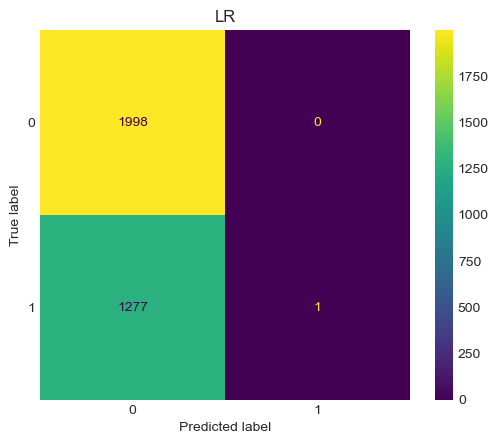

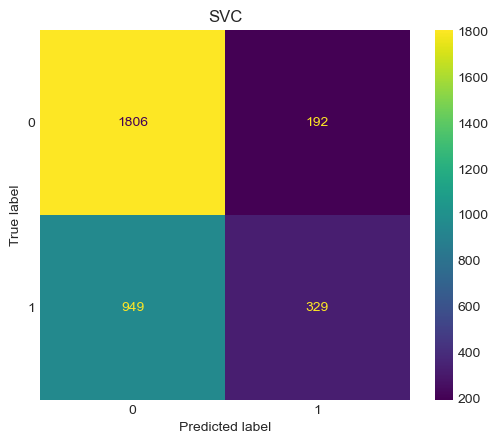

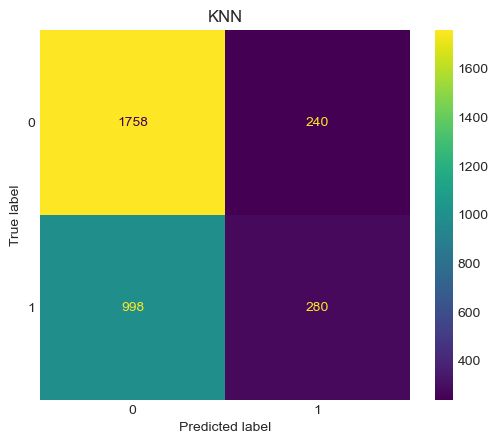

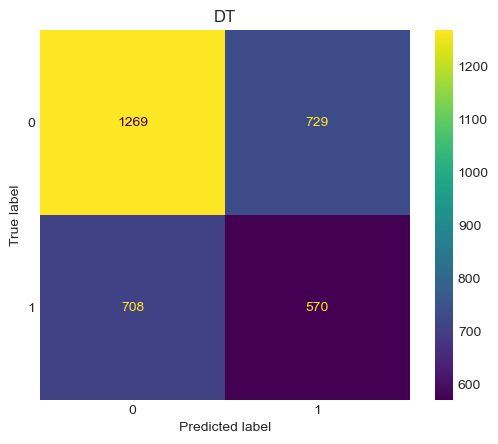

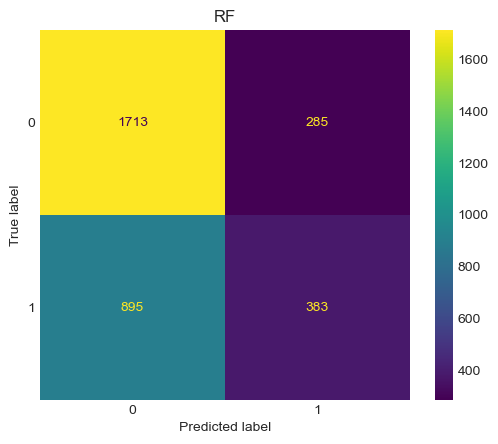

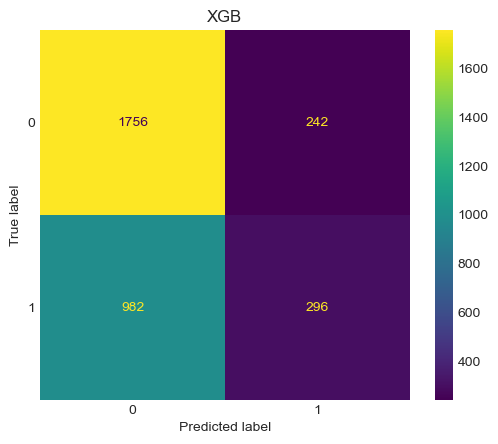

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
for name,cm in confusion_matrixs:
 cmd = ConfusionMatrixDisplay(cm)
 cmd.plot()
 cmd.ax_.set_title(name)

# Hyperparameter Tuning

# SVM

In [24]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
g_svc = GridSearchCV(SVC(), param_grid, refit = True)
g_svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [25]:
#svc_predict = cross_val_predict(g_svc, X, y, cv=10)
#sv_acc= cross_val_score(g_svc, X, y, cv = 10, scoring = 'accuracy').mean()*100
svc_predict=g_svc.predict(X_test)
sv_acc=accuracy_score(y_test,svc_predict)
print(f'Accuracy = {sv_acc}')
print(classification_report(y_test, svc_predict))

Accuracy = 0.6920731707317073
              precision    recall  f1-score   support

         0.0       0.68      0.94      0.79       402
         1.0       0.77      0.30      0.43       254

    accuracy                           0.69       656
   macro avg       0.72      0.62      0.61       656
weighted avg       0.71      0.69      0.65       656



# XGB

In [26]:
estimator = XGBClassifier()
parameters = {
    'max_depth': [2,5,8],
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
xgb_grid = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
)

xgb_grid.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [2, 5, 8],
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc')

In [27]:
xgb_predict=xgb_grid.predict(X_test)
xgb_acc=accuracy_score(y_test,xgb_predict)
print(f'Accuracy = {xgb_acc}')
print(classification_report(y_test, xgb_predict))

Accuracy = 0.6646341463414634
              precision    recall  f1-score   support

         0.0       0.67      0.90      0.77       402
         1.0       0.65      0.30      0.41       254

    accuracy                           0.66       656
   macro avg       0.66      0.60      0.59       656
weighted avg       0.66      0.66      0.63       656



# Random Forest

In [30]:
rf_param = {'bootstrap': [True, False],
 'max_depth': [30, 40, 50],
 'min_samples_leaf': [3,5],
 'min_samples_split': [5],
 'max_features':['auto','sqrt','log2'],
 'n_estimators': [500]}
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid = rf_param, cv = 3)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [3, 5], 'min_samples_split': [5],
                         'n_estimators': [500]})

In [31]:
rf_predict=rf_grid.predict(X_test)
rf_acc=accuracy_score(y_test,rf_predict)
print(f'Accuracy = {rf_acc}')
print(classification_report(y_test, rf_predict))

Accuracy = 0.6814024390243902
              precision    recall  f1-score   support

         0.0       0.68      0.92      0.78       402
         1.0       0.70      0.31      0.43       254

    accuracy                           0.68       656
   macro avg       0.69      0.61      0.60       656
weighted avg       0.69      0.68      0.64       656

